# Introduction




# Prepare for analysis

## Load packages

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from load_data import load_data
from load_data import combine_train_test

from study_data import missing_data
from study_data import most_frequent_data
from study_data import unique_values
from study_data import unique_values_summary

from clean_data import add_family_size, add_age_interval, add_fare_interval_column, add_sex_pclass
from clean_data import extract_names, parse_names, add_family_type_column, assign_family_type
from clean_data import unify_titles, calculate_survival_rate_by_title_and_sex, map_sex_column

import ML


In [2]:
# TODO: Add all hard coded parameters like file paths or model parameters here
TRAIN_PATH = "/home/trapfishscott/Cambridge24.25/D400_FODS/titanic_problem_set/train.csv"
TEST_PATH = "/home/trapfishscott/Cambridge24.25/D400_FODS/titanic_problem_set/test.csv"

## Read the data

In [3]:
train_df = load_data(TRAIN_PATH)

# TODO: Put the path at the top of the script and replace with variable
test_df = load_data(TRAIN_PATH) 

# Preliminary data inspection

## Quick glimpse of the data
Comment out as needed.

In [4]:

# train_df.head()
# test_df.head()

# train_df.info()
# test_df.info()

# train_df.describe()
# test_df.describe()

## Few statistics on the data

### Missing data

In [5]:
## Missing training data
missing_data(train_df)


Total    Percent    Types
PassengerId      0   0.000000    int64
Survived         0   0.000000    int64
Pclass           0   0.000000    int64
Name             0   0.000000   object
Sex              0   0.000000   object
Age            177  19.865320  float64
SibSp            0   0.000000    int64
Parch            0   0.000000    int64
Ticket           0   0.000000   object
Fare             0   0.000000  float64
Cabin          687  77.104377   object
Embarked         2   0.224467   object

In [6]:
# Missing test data
missing_data(test_df)

Total    Percent    Types
PassengerId      0   0.000000    int64
Survived         0   0.000000    int64
Pclass           0   0.000000    int64
Name             0   0.000000   object
Sex              0   0.000000   object
Age            177  19.865320  float64
SibSp            0   0.000000    int64
Parch            0   0.000000    int64
Ticket           0   0.000000   object
Fare             0   0.000000  float64
Cabin          687  77.104377   object
Embarked         2   0.224467   object

### Most frequent data

Training Data

In [7]:

most_frequent_data(train_df)

Total   Most frequent item  Frequence  Percent from total
PassengerId    891                  891          1               0.112
Survived       891                    0        549              61.616
Pclass         891                    3        491              55.107
Name           891  Dooley, Mr. Patrick          1               0.112
Sex            891                 male        577              64.759
Age            714                 24.0         30               4.202
SibSp          891                    0        608              68.238
Parch          891                    0        678              76.094
Ticket         891               347082          7               0.786
Fare           891                 8.05         43               4.826
Cabin          204                   G6          4               1.961
Embarked       889                    S        644              72.441

Testing Data

In [8]:
most_frequent_data(test_df)

Total   Most frequent item  Frequence  Percent from total
PassengerId    891                  891          1               0.112
Survived       891                    0        549              61.616
Pclass         891                    3        491              55.107
Name           891  Dooley, Mr. Patrick          1               0.112
Sex            891                 male        577              64.759
Age            714                 24.0         30               4.202
SibSp          891                    0        608              68.238
Parch          891                    0        678              76.094
Ticket         891               347082          7               0.786
Fare           891                 8.05         43               4.826
Cabin          204                   G6          4               1.961
Embarked       889                    S        644              72.441

### Unique values

Training Data

In [9]:
unique_values_summary(train_df)

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Total            891       891     891   891  891  714    891    891     891   
Uniques          891         2       3   891    2   88      7      7     681   

         Fare  Cabin  Embarked  
Total     891    204       889  
Uniques   248    147         3

Testing Data

In [10]:
unique_values_summary(test_df)

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Total            891       891     891   891  891  714    891    891     891   
Uniques          891         2       3   891    2   88      7      7     681   

         Fare  Cabin  Embarked  
Total     891    204       889  
Uniques   248    147         3

# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [11]:
all_df = combine_train_test(train_df, test_df, "Survived")

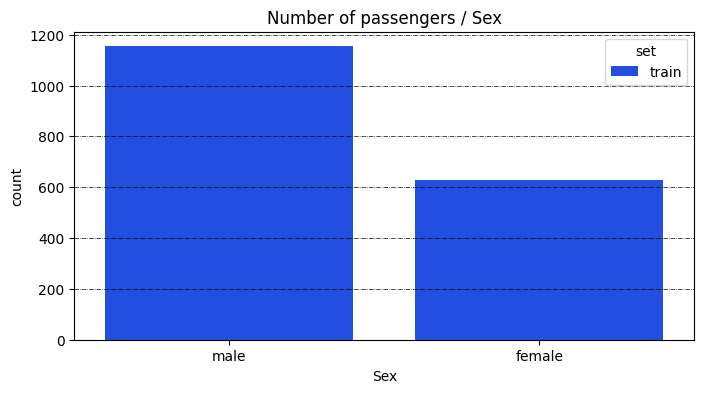

In [12]:
# Plot count pairs "Sex"
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Sex", data=all_df, hue="set", palette="bright")
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Number of passengers / Sex")
plt.show()  
plt.savefig("figures/number of passengers by sex.png")

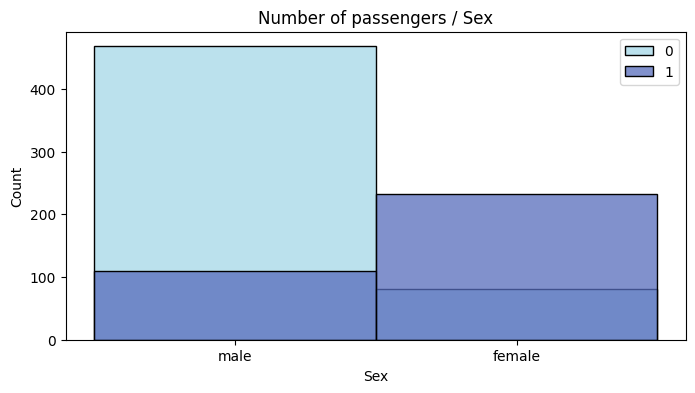

In [13]:
# Plot distribution pairs for "Sex" and hue as "Survived"
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
f, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, h in enumerate(train_df["Survived"].unique()):
    g = sns.histplot(train_df.loc[train_df["Survived"]==h, "Sex"], 
                                  color=color_list[i], 
                                  ax=ax, 
                                  label=h)
ax.set_title("Number of passengers / Sex")
g.legend()
plt.show()

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [14]:
all_df = add_family_size(all_df)
train_df = add_family_size(train_df)
test_df = add_family_size(test_df)


## Age interval

In [15]:

all_df = add_age_interval(all_df)
train_df = add_age_interval(train_df)
test_df = add_age_interval(test_df)


## Fare interval

In [16]:
all_df = add_fare_interval_column(all_df)
train_df = add_fare_interval_column(train_df)
test_df = add_fare_interval_column(test_df)

## P-class + Sex

In [17]:
all_df = add_sex_pclass(all_df)
train_df = add_sex_pclass(train_df)
test_df = add_sex_pclass(test_df)

## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [18]:
all_df = extract_names(all_df)
train_df = extract_names(train_df)
test_df = extract_names(test_df)

## Multivariate analysis


Let's look now to the interaction of multiple features.

In [19]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"
def plot_age_interval_by_pclass(df):
    """
    Plot count of 'Age Interval' grouped by 'Pclass'.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'Age Interval' and 'Pclass' columns.
    """
    # Group by 'Pclass' and 'Age Interval' and count occurrences
    count_data = df.groupby(['Pclass', 'Age Interval']).size().reset_index(name='Count')

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pclass', y='Count', hue='Age Interval', data=count_data, palette='viridis')
    
    # Adding title and labels
    plt.title('Count of Age Intervals by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.legend(title='Age Interval')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [20]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"

def plot_pclass_by_fare_interval(df):
    """
    Plot count of 'Pclass' grouped by 'Fare Interval'.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'Pclass' and 'Fare Interval' columns.
    """
    # Group by 'Fare Interval' and 'Pclass' and count occurrences
    count_data = df.groupby(['Fare Interval', 'Pclass']).size().reset_index(name='Count')

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Fare Interval', y='Count', hue='Pclass', data=count_data, palette='viridis')
    
    # Adding title and labels
    plt.title('Count of Passenger Class by Fare Interval')
    plt.xlabel('Fare Interval')
    plt.ylabel('Count')
    plt.legend(title='Pclass')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [21]:
add_family_type_column([all_df, train_df, test_df])

In [22]:
assign_family_type([all_df, train_df, test_df])

/home/trapfishscott/Cambridge24.25/D400_FODS/titanic_problem_set/clean_data.py:149: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset["Family Size"] == 1, "Family Type"] = "Single"
/home/trapfishscott/Cambridge24.25/D400_FODS/titanic_problem_set/clean_data.py:149: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset["Family Size"] == 1, "Family Type"] = "Single"
/home/trapfishscott/Cambridge24.25/D400_FODS/titanic_problem_set/clean_data.py:149: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible wi

In [23]:
for dataset in [all_df, train_df, test_df]:
    dataset["Titles"] = dataset["Title"]

In [24]:
all_datasets = [all_df, train_df, test_df]

In [28]:
all_df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 1782, dtype: int64

In [27]:
def calculate_survival_rate_by_title_and_sex(dataset):
    """
    Calculate the mean survival rate grouped by 'Titles' and 'Sex'.

    Parameters:
    dataset (pd.DataFrame): The DataFrame containing the relevant columns.

    Returns:
    pd.DataFrame: A DataFrame with the mean survival rates grouped by 'Titles' and 'Sex'.
    """
    return dataset[['Titles', 'Sex', 'Survived']].groupby(['Titles', 'Sex'], as_index=False).mean()

calculate_survival_rate_by_title_and_sex(all_df)

Titles  Sex  Survived
0  Master.    0  0.575000
1    Miss.    1  0.702703
2      Mr.    0  0.156673
3     Mrs.    1  0.793651
4     Rare    0  0.250000
5     Rare    1  1.000000

In [29]:
calculate_survival_rate_by_title_and_sex(train_df)

Titles  Sex  Survived
0  Master.    0  0.575000
1    Miss.    1  0.702703
2      Mr.    0  0.156673
3     Mrs.    1  0.793651
4     Rare    0  0.250000
5     Rare    1  1.000000

In [30]:
calculate_survival_rate_by_title_and_sex(test_df)

Titles  Sex  Survived
0  Master.    0  0.575000
1    Miss.    1  0.702703
2      Mr.    0  0.156673
3     Mrs.    1  0.793651
4     Rare    0  0.250000
5     Rare    1  1.000000

In [26]:
unify_titles(all_datasets)
#calculate_survival_rate_by_title_and_sex(all_datasets)
map_sex_column(all_datasets)

# Baseline model

## Feature engineering: Map categorical value to numerical values

Create train-validation split.

In [33]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [34]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [36]:
# TODO: prepare_datasets

train_X = ML.prepare_datasets(train=train, valid=valid, predictors=predictors, target=target)[0]
train_Y = ML.prepare_datasets(train=train, valid=valid, predictors=predictors, target=target)[1]
valid_X = ML.prepare_datasets(train=train, valid=valid, predictors=predictors, target=target)[2]
valid_Y = ML.prepare_datasets(train=train, valid=valid, predictors=predictors, target=target)[3]


Initialize the classifiction algorithm.

In [37]:
# TODO: train_and_predict_random_forest

preds_train = ML.train_and_predict_random_forest(train_X=train_X, train_Y=train_Y, valid_X=valid_X, random_state=42, n_estimators=100, criterion="gini")[0]
preds_valid = ML.train_and_predict_random_forest(train_X=train_X, train_Y=train_Y, valid_X=valid_X, random_state=42, n_estimators=100, criterion="gini")[1]

Fit the classifier with the training data.

Predict the train data (to check the training classification error).

Predict the validation data.

# Evaluation

## Classification report for training data.

In [40]:
print(metrics.classification_report(train_Y, preds_train, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.75      0.99      0.86       444
    Survived       0.96      0.47      0.63       268

    accuracy                           0.79       712
   macro avg       0.86      0.73      0.74       712
weighted avg       0.83      0.79      0.77       712



Classification report for validation data.

In [41]:
print(metrics.classification_report(valid_Y, preds_valid, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.73      0.96      0.83       105
    Survived       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179

